<a href="https://colab.research.google.com/github/ML4SCIHackathon/ML4SCI/blob/main/HiggsBosonClassificationChallenge/higgs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**This is an example Notebook for running training on Higgs vs background signal classification. **

**Background:** High-energy collisions at the Large Hadron Collider (LHC) produce particles that interact with particle detectors. One important task is to classify different types of collisions based on their physics content, allowing physicists to find patterns in the data and to potentially unravel new discoveries. 

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS Collaborations was announced at CERN in 2012. In this work, we focus on the potential of Machine Learning and Deep Learning in detecting potential Higgs signal from one of the background processes that mimics it. 

**Dataset:** The dataset is made available by the Center for Machine Learning and Intelligent Systems at University of California, Irvine. 
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples of Higgs vs background events produced by Monte Carlo simulations. Each sample consists of 28 features. The first 21 features are kinematic properties measured at the level of the detectors. The last seven are functions of the first 21.




**Steps to load the training dataset**
1. Download the dataset from the UCI website. 

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

2. Unzip the dataset folder

In [ ]:
 !gzip -d HIGGS.csv.gz

In [ ]:
pip install plot-metric 

In [105]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [106]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [107]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import h5py
from keras.models import Sequential
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

**Load the file using pandas library**

In [108]:
data=pd.read_csv('./HIGGS.csv')

In [109]:
data.shape

(10999999, 29)

Assign first column 0 to class labels (labeled 1 for signal, 0 for background)  and all others to feature matrix X.

In this example, for the sake of fast checking, we use 1000 samples. To train on the entire dataset, proceed with uncommenting the lines below. 

In [110]:
X=data.iloc[:1100000,1:]#data.iloc[:,1:]
y=data.iloc[:1100000,0]#data.iloc[:,0]

Split your data into training and validation samples where the fraction of the data used for validation is 33%. 

In [111]:
# TRAINING SAMPLES = 737000
# VALIDATION SAMPLES = 363000
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [112]:
X_train1

,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
1074749,0.729840,-0.114009,0.668470,1.871964,-0.426785,1.355512,-0.029732,-0.521609,2.173076,3.025209,...,-0.839114,1.601870,0.000000,0.906205,1.117819,1.350422,0.656801,0.457228,0.690633,0.690516
1062145,0.899307,-0.480221,-0.863608,2.599179,-1.289305,1.551460,-1.684406,0.950360,0.000000,0.632161,...,-0.586768,0.805571,1.550981,0.819676,1.034069,0.991139,0.841814,0.869429,0.987353,0.996984
174224,1.342555,-1.019799,1.413093,0.358799,-0.988126,1.258042,1.147651,-1.134196,0.000000,1.869793,...,-1.203890,0.760623,3.101961,1.606475,1.143080,0.987645,0.983979,0.372906,0.964013,0.866613
410402,1.030158,-0.610733,-1.617664,0.780539,-0.686808,0.885292,1.141710,-0.079772,2.173076,0.577142,...,0.722430,-0.928080,0.000000,1.262262,1.036194,0.992646,1.557282,0.925992,1.144251,1.031324
184181,1.350424,1.315778,1.366485,0.571174,-0.420196,1.185031,0.045525,-0.799354,2.173076,0.497445,...,-0.989855,0.579722,3.101961,0.670658,0.924835,1.215790,1.549762,1.607111,1.312903,0.998282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.788586,-0.354579,0.905950,0.870206,1.074697,0.451349,0.078203,-1.617612,2.173076,0.680634,...,-0.944049,-1.342599,0.000000,0.918180,1.026455,0.986134,0.879795,0.718234,0.981404,1.548375
259178,0.324658,0.856064,-0.579519,1.099081,-1.536288,1.129517,-0.404039,0.338884,0.000000,0.718909,...,0.302687,0.707351,0.000000,0.779641,1.060481,0.978867,0.689341,0.883801,0.901593,0.808299
131932,0.862339,-1.268162,-0.696595,0.519568,1.398865,1.011985,0.072261,-1.225114,2.173076,1.489438,...,-1.213051,1.648482,0.000000,0.624119,1.115521,0.991976,1.397756,1.804373,1.250584,1.006668
671155,0.587825,1.719975,1.375918,0.851554,-1.369054,1.454081,0.243571,1.050148,2.173076,1.729788,...,-0.585935,-0.741629,0.000000,0.921326,2.490229,0.992499,1.070218,0.998546,2.047518,1.737910


In [156]:
X_val

,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
255968,1.803372,1.130724,-0.191113,1.081142,1.724209,0.849565,-1.446751,1.687679,0.000000,0.776699,...,-0.729181,1.271697,0.000000,0.503964,0.662570,1.911101,1.149485,0.986362,0.993674,1.276092
780983,2.014930,0.978785,0.411569,0.667062,1.337087,0.362398,0.338633,-1.632580,2.173076,0.383754,...,0.988100,1.280576,0.000000,0.712477,0.610774,1.189938,0.961014,0.417702,0.716656,0.699690
214662,0.779070,1.806658,-0.673290,1.254218,-1.296059,0.887949,-0.187179,0.807886,2.173076,0.452623,...,0.535878,0.014821,1.550981,0.903535,0.961955,0.990078,1.301102,0.994303,1.552084,1.318619
339422,0.394202,-0.335099,0.046470,0.538785,-0.405269,0.897293,-1.742830,1.695995,0.000000,0.953089,...,-0.041269,0.837756,3.101961,0.895627,1.042416,0.992850,0.998636,0.876856,0.922443,1.120752
634690,0.720507,-0.696442,0.820502,0.890894,-1.414209,0.952165,-0.989265,0.655433,1.086538,1.080378,...,-0.536799,1.240067,0.000000,1.095034,1.074422,1.003318,0.851035,1.517776,1.012460,0.852904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136856,0.327952,-0.937986,0.951449,0.714200,-0.932298,0.641067,-0.056469,-0.247193,2.173076,1.340998,...,2.066607,1.278356,0.000000,1.088769,1.331389,0.988117,2.130616,1.013534,1.457716,1.333156
1036666,0.365286,-1.054862,-1.521673,1.535157,0.677757,0.828862,1.099130,-0.019899,2.173076,0.776573,...,-0.287785,-1.483547,3.101961,0.888916,0.939666,0.988651,0.934369,1.405765,1.335696,1.237653
116217,0.387796,-1.690864,0.868775,1.206100,-0.417922,0.609554,0.140587,-1.568272,0.000000,1.174176,...,-0.411043,-0.666716,3.101961,0.767163,0.596650,0.989367,0.914324,0.698992,0.841752,0.981267
576539,0.500164,-0.402303,1.482451,0.915269,-0.838185,0.809625,0.446568,0.984731,2.173076,0.578904,...,1.094702,1.452598,0.000000,0.533804,0.744061,0.988904,1.201349,1.122408,0.866457,0.745658


**Visualize your data - One histogram per feature column**

Detailed information on what each feature column is can be found in *Attribute Information* section on the [UCI Machine learning Repositery](https://archive.ics.uci.edu/ml/datasets/HIGGS). For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al 

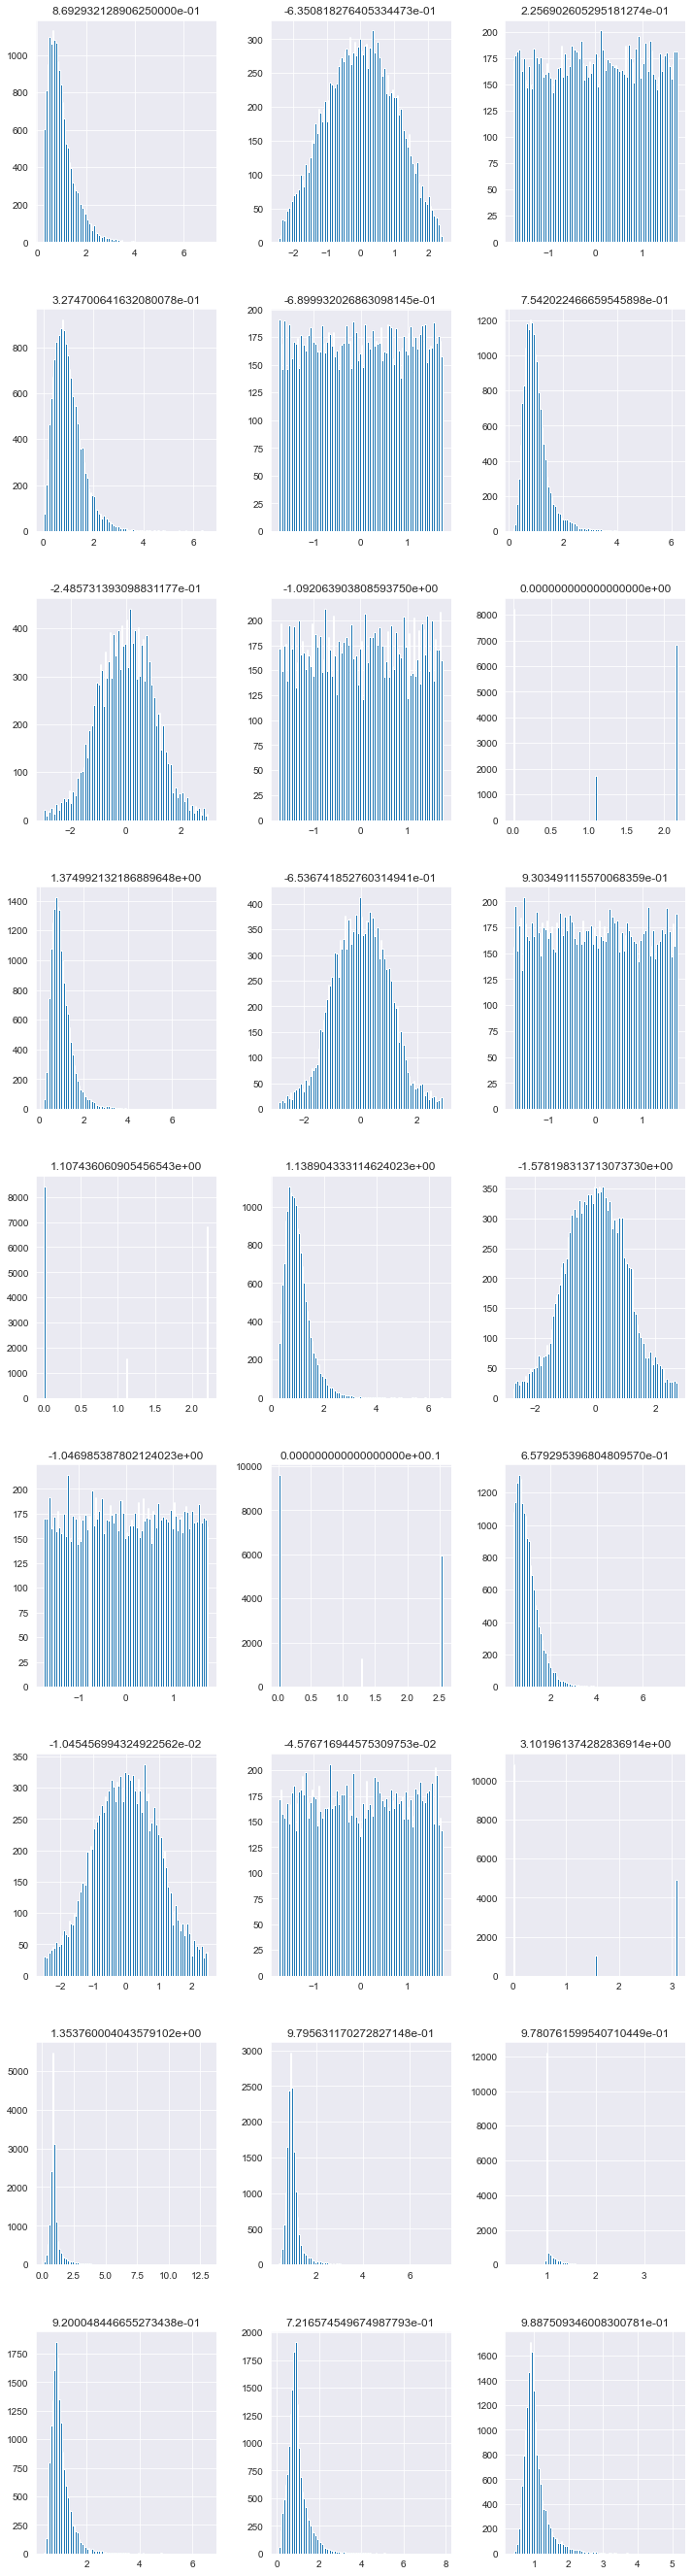

In [113]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X_train.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_train.hist(column = X_train.columns[i], bins = 100, ax=axis)
        i = i+1

# USING ANN MODEL

**Setup the Neural Network** (some useful info [here](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc))

In [114]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [115]:
model_nn = Sequential()
model_nn.add(Dense(28, input_dim=28, activation='relu'))
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

In [116]:
model_nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 1,223
Trainable params: 1,223
Non-trainable params: 0
_________________________________________________________________


**Train the Neural Network and save your model weights in a h5 file**

In [117]:
# compile the keras model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model_nn.fit(X_train1, y_train1,validation_data=(X_val,y_val),epochs=49, batch_size=50)
# evaluate the keras model

#_, accuracy = model_nn.evaluate(X_val, y_val)
#model_nn.save('my_model.h5') ##Saving model weights
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/49
14740/14740 [==============================] - 8s 533us/step - loss: 0.6152 - accuracy: 0.6547 - val_loss: 0.5863 - val_accuracy: 0.6863
Epoch 2/49
14740/14740 [==============================] - 8s 535us/step - loss: 0.5844 - accuracy: 0.6879 - val_loss: 0.5783 - val_accuracy: 0.6932
Epoch 3/49
14740/14740 [==============================] - 10s 666us/step - loss: 0.5738 - accuracy: 0.6973 - val_loss: 0.5697 - val_accuracy: 0.7003
Epoch 4/49
14740/14740 [==============================] - 10s 693us/step - loss: 0.5666 - accuracy: 0.7037 - val_loss: 0.5627 - val_accuracy: 0.7062
Epoch 5/49
14740/14740 [==============================] - 10s 699us/step - loss: 0.5613 - accuracy: 0.7069 - val_loss: 0.5568 - val_accuracy: 0.7099
Epoch 6/49
14740/14740 [==============================] - 10s 710us/step - loss: 0.5572 - accuracy: 0.7099 - val_loss: 0.5558 - val_accuracy: 0.7116
Epoch 7/49
14740/14740 [==============================] - 10s 706us/step - loss: 0.5544 - accuracy: 0.7115 -

In [144]:
weights = model_nn.layers[0].get_weights()[0]

In [145]:
weights # WEIGHTS

array([[ 6.58633828e-01,  2.91419649e+00,  1.90500751e-01,
        -3.45130498e-03,  5.99014759e-01,  9.93972540e-01,
         8.02120805e-01,  1.25406072e-01, -5.48905969e-01,
         7.59290636e-01,  8.09982836e-01,  3.82886231e-02,
        -1.44304693e-01,  1.41401863e+00,  5.51507175e-01,
         6.76507205e-02, -2.42073521e-01, -8.66639793e-01,
         5.65902293e-01, -5.81068873e-01,  2.33948663e-01,
         3.89787942e-01, -7.06266880e-01, -2.97669709e-01,
        -3.53005052e-01,  2.81336379e+00, -3.31727058e-01,
        -2.20327765e-01],
       [-7.59124309e-02,  1.19773924e+00,  2.59607378e-02,
         2.49807928e-02, -1.22610950e+00, -1.52612686e-01,
         2.02623653e+00, -4.08285916e-01,  7.58703649e-02,
        -4.56027947e-02,  5.22894226e-02, -2.40560248e-02,
        -1.16862822e-02,  2.04234123e+00,  5.72101362e-02,
         9.47396178e-03, -2.35293936e-02,  1.27124354e-01,
        -1.23581914e-02,  1.21443689e-01,  1.02779446e-02,
        -1.15249213e-02,  5.54

In [146]:
biases = model_nn.layers[0].get_weights()[1]

In [147]:
biases # BIASES

array([ 0.42876536, -2.636871  , -3.133391  , -0.21402127, -0.01613767,
        0.24638681, -1.0909663 , -1.2936528 , -1.6251913 , -1.3448228 ,
       -1.6287134 , -2.5753882 ,  2.589398  , -2.3960936 ,  1.4228315 ,
        2.2282984 , -1.7310858 ,  3.1919067 ,  0.6955804 , -0.61121124,
        2.7032175 ,  1.8859388 ,  0.5802684 , -1.503405  , -0.16874968,
       -2.7698474 , -1.30873   , -1.1542922 ], dtype=float32)

In [ ]:
# Validation Accuracy = 0.7362
# Training Accuracy = 0.7341
# Validation Loss = 0.5240
# Training Loss = 0.5240

In [118]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


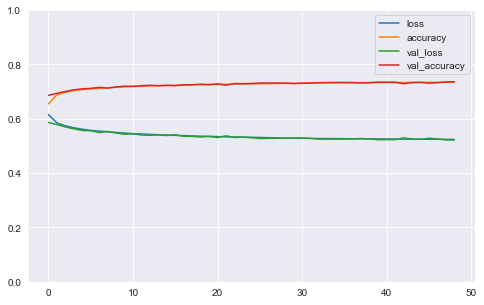

In [119]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Plot accuracy wrt number of epochs**

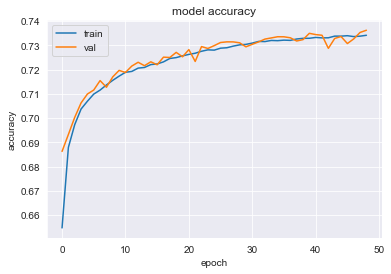

In [122]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Plot training loss wrt number of epochs**

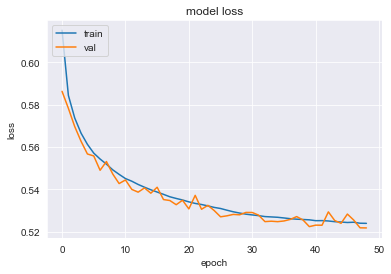

In [123]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [124]:
y_pred=model_nn.predict(X_val)

In [125]:
confusion_matrix(y_val, y_pred.round())

array([[120483,  50210],
       [ 45550, 146757]], dtype=int64)

In [126]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_val,y_pred.round())

0.7450842019221494

In [127]:
recall_score(y_val,y_pred.round())

0.7631391473009302

**Plot the ROC (Receiver Operating Characteristic) Curve** (more info on ROC could be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

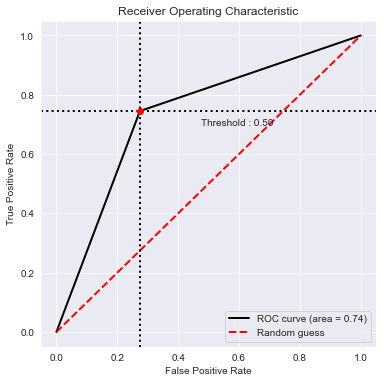

In [157]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_pred.round(), y_val, labels=["Class 1", "Class 2"])

# Figures
Y = plt.figure(figsize=(6,6))
bc.plot_roc_curve()
plt.show()
Y.savefig('ROC_ANN.png')

**Goal:** Please train your own machine learning model (or modify provided examples) with the goal of attaining the top classifier performance.

**Deliverables:**

Please submit the following:

Your full notebook used for training including the ROC Curves, model weights and loss and accuracy plots wrt number of epochs.

**References:**

Baldi, P., Sadowski P., and Whiteson D. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014).

In [ ]:
# UTILIZING RANDOM FOREST

In [129]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [130]:
rnd_clf=RandomForestClassifier(n_estimators=800, random_state=42,max_depth=25,min_samples_split=15)
rnd_clf.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=25, min_samples_split=15, n_estimators=800,
                       random_state=42)

In [131]:
scores_rnd_clf = cross_val_score(RandomForestClassifier(), X_train1, y_train1, cv=5)


In [132]:
print('Cross-validation scores using k fold cross validation=')
print(scores_rnd_clf.mean())

Cross-validation scores using k fold cross validation=
0.7323514246947084


In [133]:
validation_RNF=rnd_clf.predict(X_val)
confusion_matrix(y_val, validation_RNF)


Confusion_matrix=
<function confusion_matrix at 0x0000012195E26280>


In [134]:
confusion_matrix(y_val, validation_RNF)

array([[121267,  49426],
       [ 45741, 146566]], dtype=int64)

In [135]:
accuracy_score(y_val, validation_RNF)


0.737831955922865

In [154]:
precision_score(y_val,validation_RNF)

0.7478162373974447

In [155]:
recall_score(y_val,validation_RNF)

0.7621459437253975

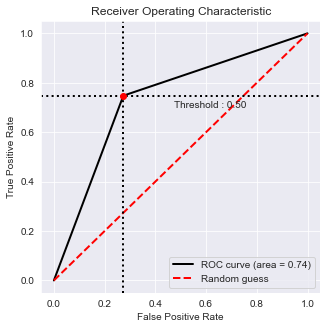

In [152]:
# Visualisation with plot_metric
bc = BinaryClassification(validation_RNF.round(), y_val, labels=["Class 1", "Class 2"])

# Figures
X = plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()
X.savefig('ROC_RF.png')
